In [2]:
import pennylane as qml
import numpy as np
import math
import matplotlib.pyplot as plt

Résolution de Sudoku avec l'algorithm de Grover pour n=2

In [3]:
pair_a_verifier = [(0, 1), (0, 2), (1, 3), (2, 3)]

wire_reg = qml.registers({"x" : 4, "c" : 4, "v" : 1})
dev = qml.device("default.qubit")

def XOR(a, b, output):
    qml.CNOT(wires=[a, output])
    qml.CNOT(wires=[b, output])

def sudoku_oracle():
    i = 0
    for pair in pair_a_verifier:
        XOR(pair[0], pair[1], wire_reg["c"][i])
        i += 1

    qml.MultiControlledX(wires=wire_reg["c"] + wire_reg["v"])

    i = 0
    for pair in pair_a_verifier:
        XOR(pair[0], pair[1], wire_reg["c"][i])
        i += 1

def diffuser_matrix(n_bits):
    psi_piece = (1 / 2**n_bits) * np.ones(2**n_bits)
    ident_piece = np.eye(2**n_bits)
    return 2 * psi_piece - ident_piece


In [4]:
@qml.qnode(dev)
def circuit():
    # Initialisation
    for i in range(4):
        qml.Hadamard(wires=wire_reg["x"][i])

    qml.PauliX(wires=wire_reg["v"])
    qml.Hadamard(wires=wire_reg["v"])

    # Première itération de Grover 
    sudoku_oracle()
    qml.QubitUnitary(diffuser_matrix(4), wires=[0, 1, 2, 3])

    # Deuxième itération de Grover
    sudoku_oracle()
    qml.QubitUnitary(diffuser_matrix(4), wires=[0, 1, 2, 3])

    return qml.probs(wires=wire_reg["x"])

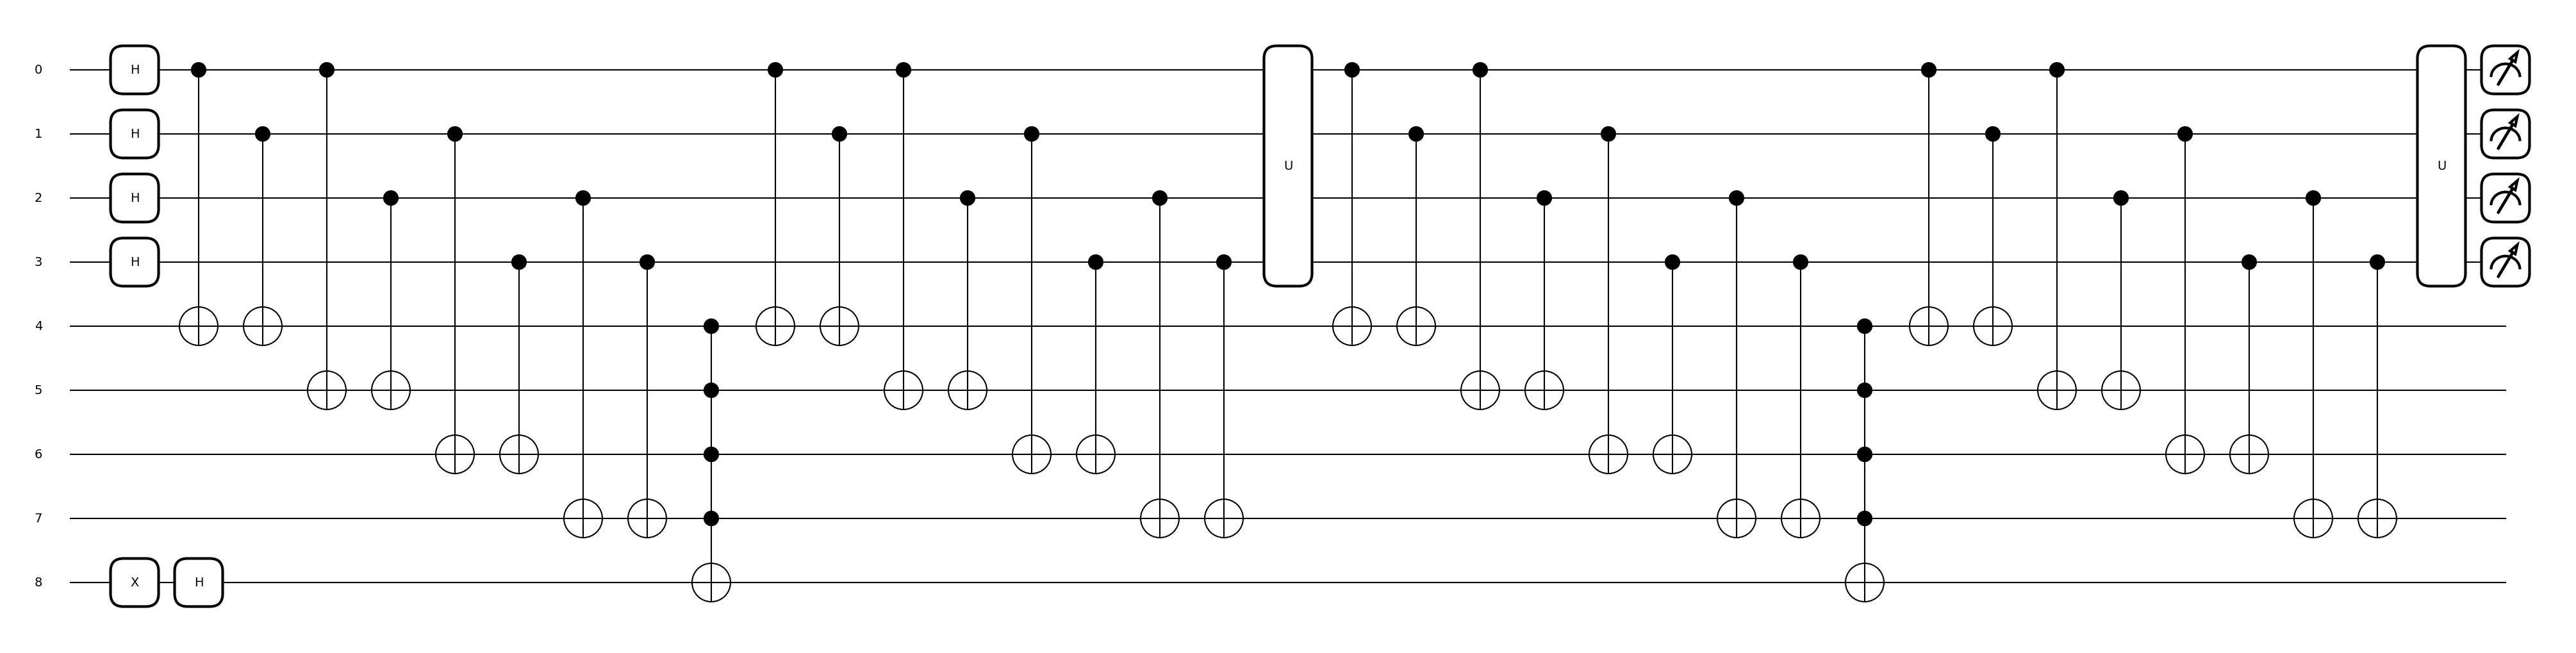

In [5]:
fig, ax = qml.draw_mpl(circuit)()

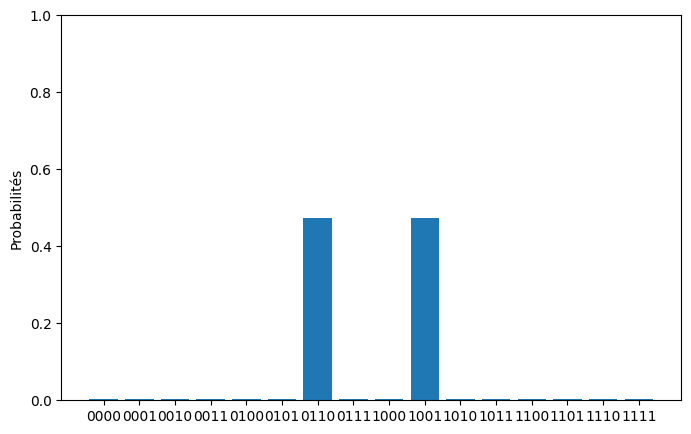

In [6]:
results = circuit()

# The number of qubits determines the number of possible outcomes (2^n)
num_qubits = 4
outcomes = [format(i, '0' + str(num_qubits) + 'b') for i in range(2**num_qubits)]

# Create the plot
plt.figure(figsize=(8, 5))
plt.bar(outcomes, results)

# Add labels and title
plt.ylabel("Probabilités")
plt.ylim(0, 1) # Probabilities are between 0 and 1

# Display the plot
plt.show()

In [7]:
results

array([0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.47265625, 0.00390625, 0.00390625, 0.47265625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625])

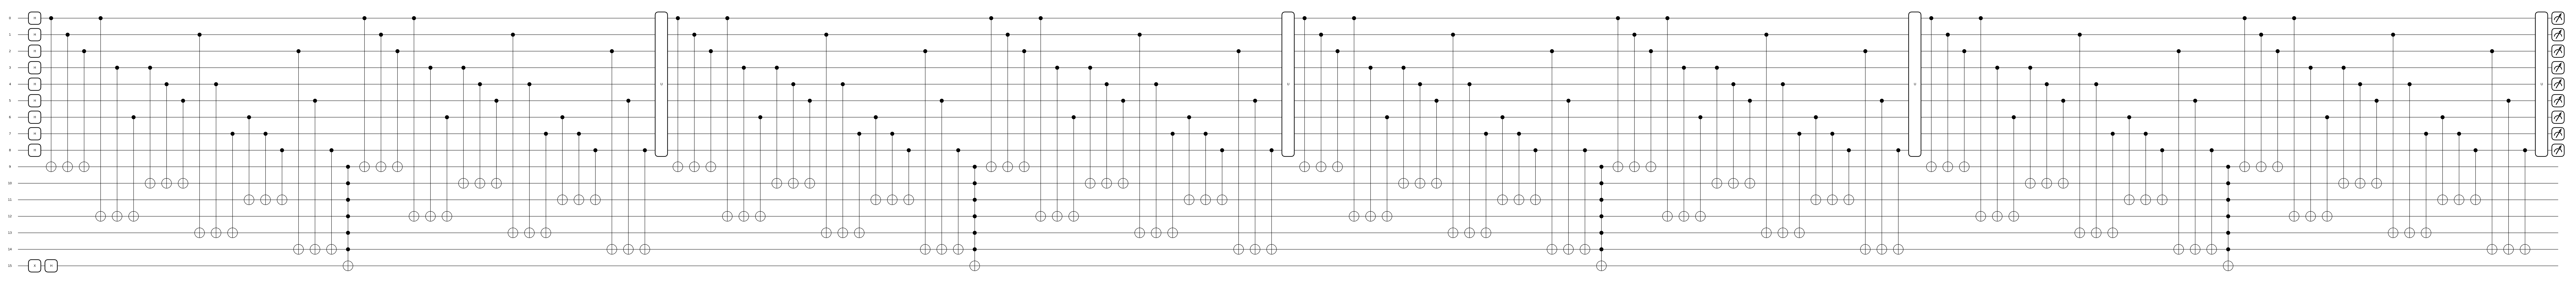

In [3]:
dev = qml.device("default.qubit")

def sudoku_oracle(sudoku_size):
    n_qubits = sudoku_size * sudoku_size

    for row in range(sudoku_size):
        k = row * sudoku_size

        qml.CNOT(wires=[k + 0, row + n_qubits])
        qml.CNOT(wires=[k + 1, row + n_qubits])
        qml.CNOT(wires=[k + 2, row + n_qubits])
            
        qml.CNOT(wires=[row + 0 * sudoku_size, row + n_qubits + sudoku_size])
        qml.CNOT(wires=[row + 1 * sudoku_size, row + n_qubits + sudoku_size])
        qml.CNOT(wires=[row + 2 * sudoku_size, row + n_qubits + sudoku_size])

    qml.MultiControlledX(wires=range(n_qubits, sudoku_size * 2 + n_qubits + 1))

    for row in range(sudoku_size):
        k = row * sudoku_size

        qml.CNOT(wires=[k + 0, row + n_qubits])
        qml.CNOT(wires=[k + 1, row + n_qubits])
        qml.CNOT(wires=[k + 2, row + n_qubits])
            
        qml.CNOT(wires=[row + 0 * sudoku_size, row + n_qubits + sudoku_size])
        qml.CNOT(wires=[row + 1 * sudoku_size, row + n_qubits + sudoku_size])
        qml.CNOT(wires=[row + 2 * sudoku_size, row + n_qubits + sudoku_size])



def diffuser_matrix(n_bits):
    psi_piece = (1 / 2**n_bits) * np.ones(2**n_bits)
    ident_piece = np.eye(2**n_bits)
    return 2 * psi_piece - ident_piece

@qml.qnode(dev)
def circuit2(sudoku_size):
    n_qubits = sudoku_size * sudoku_size

    # Initialisation
    for i in range(n_qubits):
        qml.Hadamard(wires=i)

    qml.PauliX(wires=sudoku_size * 2 + n_qubits )
    qml.Hadamard(wires=sudoku_size * 2 + n_qubits)

    for i in range(4):
        sudoku_oracle(3)
        qml.QubitUnitary(diffuser_matrix(n_qubits), wires=range(n_qubits))

    return qml.probs(wires=range(n_qubits))


fig, ax = qml.draw_mpl(circuit2)(3)

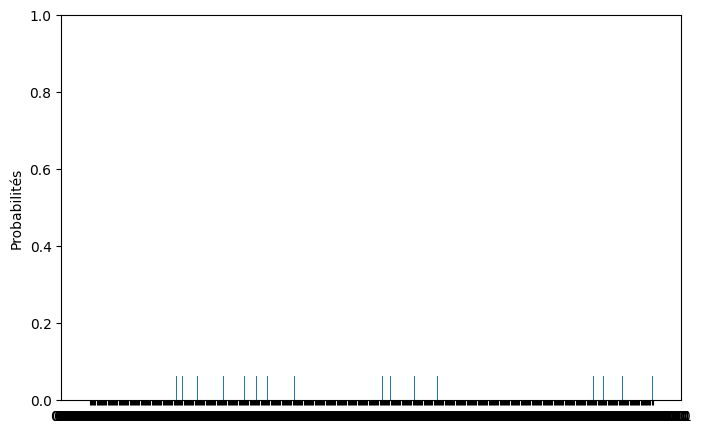

In [4]:
results = circuit2(3)

# The number of qubits determines the number of possible outcomes (2^n)
num_qubits = 9
outcomes = [format(i, '0' + str(num_qubits) + 'b') for i in range(2**num_qubits)]

# Create the plot
plt.figure(figsize=(8, 5))
plt.bar(outcomes, results)

# Add labels and title
plt.ylabel("Probabilités")
plt.ylim(0, 1) # Probabilities are between 0 and 1

# Display the plot
plt.show()

In [5]:
for i in range(len(results)):
    if results[i] > 0.01:
        print(f"Configuration {outcomes[i]} avec probabilité {results[i]:.4f}")

Configuration 001001111 avec probabilité 0.0624
Configuration 001010100 avec probabilité 0.0624
Configuration 001100010 avec probabilité 0.0624
Configuration 001111001 avec probabilité 0.0624
Configuration 010001100 avec probabilité 0.0624
Configuration 010010111 avec probabilité 0.0624
Configuration 010100001 avec probabilité 0.0624
Configuration 010111010 avec probabilité 0.0624
Configuration 100001010 avec probabilité 0.0624
Configuration 100010001 avec probabilité 0.0624
Configuration 100100111 avec probabilité 0.0624
Configuration 100111100 avec probabilité 0.0624
Configuration 111001001 avec probabilité 0.0624
Configuration 111010010 avec probabilité 0.0624
Configuration 111100100 avec probabilité 0.0624
Configuration 111111111 avec probabilité 0.0624


In [72]:
results

array([0.00149536, 0.00149536, 0.00149536, 0.00149536, 0.00149536,
       0.00149536, 0.00149536, 0.00149536, 0.00149536, 0.00149536,
       0.00149536, 0.00149536, 0.00149536, 0.00149536, 0.00149536,
       0.00149536, 0.00149536, 0.00149536, 0.00149536, 0.00149536,
       0.00149536, 0.00149536, 0.00149536, 0.00149536, 0.00149536,
       0.00149536, 0.00149536, 0.00149536, 0.00149536, 0.00149536,
       0.00149536, 0.00149536, 0.00149536, 0.00149536, 0.00149536,
       0.00149536, 0.00149536, 0.00149536, 0.00149536, 0.00149536,
       0.00149536, 0.00149536, 0.00149536, 0.00149536, 0.00149536,
       0.00149536, 0.00149536, 0.00149536, 0.00149536, 0.00149536,
       0.00149536, 0.00149536, 0.00149536, 0.00149536, 0.00149536,
       0.00149536, 0.00149536, 0.00149536, 0.00149536, 0.00149536,
       0.00149536, 0.00149536, 0.00149536, 0.00149536, 0.00149536,
       0.00149536, 0.00149536, 0.00149536, 0.00149536, 0.00149536,
       0.00149536, 0.00149536, 0.00149536, 0.00149536, 0.00149